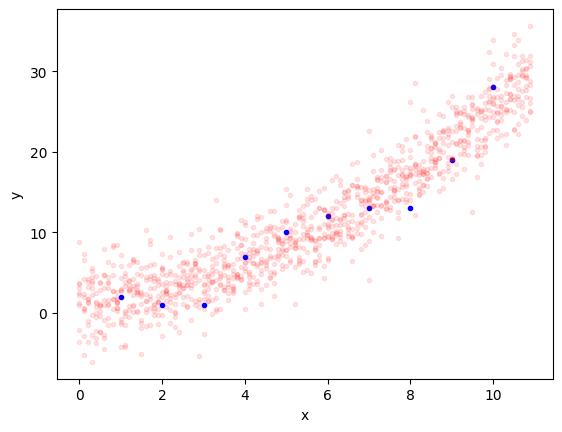

In [15]:
from pangolin import d,t,sample,Given,vmap
import numpy as np
from matplotlib import pyplot as plt

# training data
x_train = np.array([1,2,3,4,5,6,7,8,9,10])
y_train = np.array([2,1,1,7,10,12,13,13,19,28])

# test inputs
x_test = np.arange(0,11,.1)

# define diagonal normal distribution; vectorize over mean only
diag_norm = vmap(d.norm,[True,False])

# model for training and test data
w0     = d.norm(0,.10)      # bias term
w1     = d.norm(0,.10)      # linear term
w2     = d.norm(0,.10)      # quadratic term
s      = t.exp(d.norm(0,1)) # noise strength
y      = diag_norm(w0 + w1*x_train + w2*x_train**2,1/s)
y_test = diag_norm(w0 + w1*x_test  + w2*x_test**2 ,1/s)

# do inference
y_pred = sample(y_test,Given(y==y_train))

# plot results
plt.plot(x_train,y_train,'b.')
plt.plot(x_test,np.array(y_pred)[::100,:].T,'r.',alpha=0.1);
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('regression.png')